In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools


In [5]:

# Define the CNN model
def create_model(input_shape, num_classes):
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Conv Block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Conv Block
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fourth Conv Block
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    # Global Average Pooling
    #model.add(GlobalAveragePooling2D())

    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


input_shape = (256, 256, 3)  
num_classes = 3  # Number of classes

# Create the model
model = create_model(input_shape, num_classes)

# Model Checkpoint Callback
checkpoint_path = "apple_leaf_deases23.keras"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, save_best_only=True, monitor='val_loss', mode='min')
model.summary() # model summary



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,811,459 (25.98 MB)

 Trainable params: 6,811,459 (25.98 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

f_name = "Processed5_dataset"
m = 256
n = 256

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(f_name,"train"),  # Path t   o training data
    target_size=(m,n),
    batch_size=16,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
     os.path.join(f_name,"validation"),  # Path to validation data
    target_size=(m,n),
    batch_size=16,
    class_mode='categorical'
)


Found 3749 images belonging to 3 classes.
Found 1249 images belonging to 3 classes.


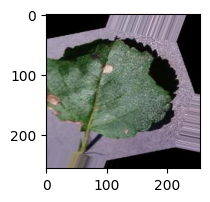

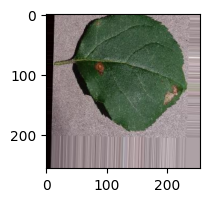

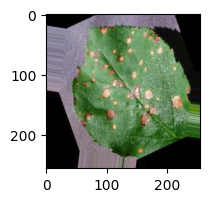

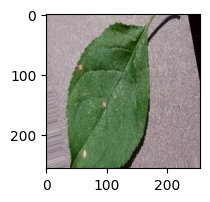

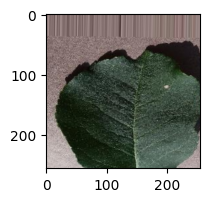

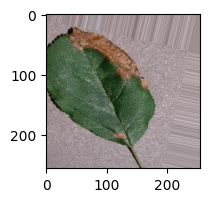

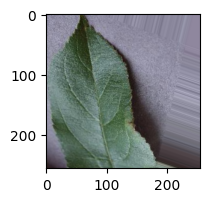

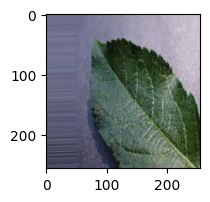

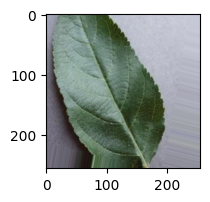

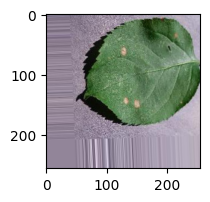

In [7]:
images , lable = next(train_generator)

for i in range(10):
 plt.figure(figsize=(2, 2))
 plt.imshow((images[i]*255 ).astype(np.uint8))
 plt.show()

In [8]:
# Train the model with the callback
history = model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=[checkpoint])



Epoch 1/30


C:\Users\works\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 103s 428ms/step - accuracy: 0.6978 - loss: 0.7282 - val_accuracy: 0.7958 - val_loss: 0.6416
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 349ms/step - accuracy: 0.8502 - loss: 0.4166 - val_accuracy: 0.7302 - val_loss: 1.3986
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 86s 362ms/step - accuracy: 0.8630 - loss: 0.3599 - val_accuracy: 0.8319 - val_loss: 0.8003
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 86s 360ms/step - accuracy: 0.8851 - loss: 0.2998 - val_accuracy: 0.9039 - val_loss: 0.2452
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 85s 357ms/step - accuracy: 0.8990 - loss: 0.2629 - val_accuracy: 0.8943 - val_loss: 0.2922
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 354ms/step - accuracy: 0.9108 - loss: 0.2540 - val_accuracy: 0.8943 - val_loss: 0.3347
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 355ms/step - accuracy: 0.9291 - loss: 0.2101 - val_accuracy: 0.8967 - val_loss: 0.2675
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 87s 367ms/step - accuracy: 0.9174 - loss: 0.2260 - va

In [9]:
# Load the best model
model.load_weights(checkpoint_path)

In [12]:
 # Test the model on unseen data
test_generator = test_datagen.flow_from_directory(
    os.path.join(r"APPLE_LEAF_DESIES_DATASET"),  # Path to test data
    target_size=(m,n),
    batch_size=1,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")


Found 34328 images belonging to 3 classes.
34328/34328 ━━━━━━━━━━━━━━━━━━━━ 351s 10ms/step - accuracy: 0.7212 - loss: 2.4134
Test Accuracy: 0.72


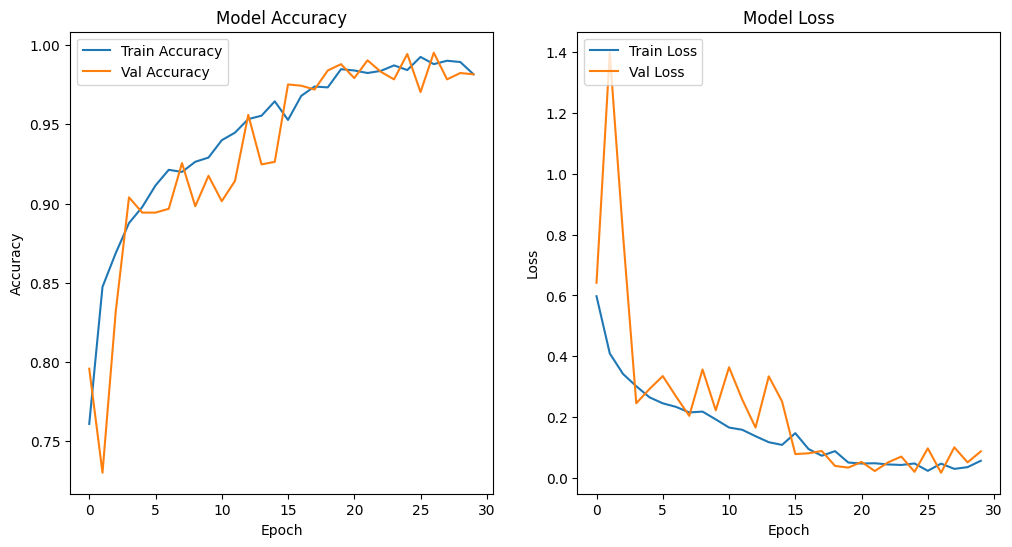

34328/34328 ━━━━━━━━━━━━━━━━━━━━ 319s 9ms/step


<Figure size 800x600 with 0 Axes>

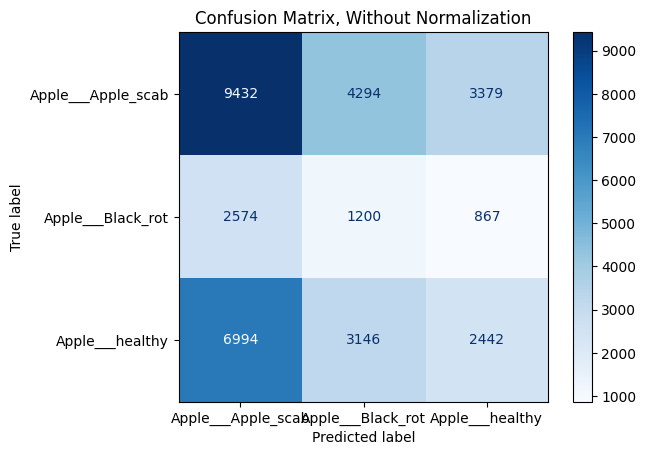

<Figure size 800x600 with 0 Axes>

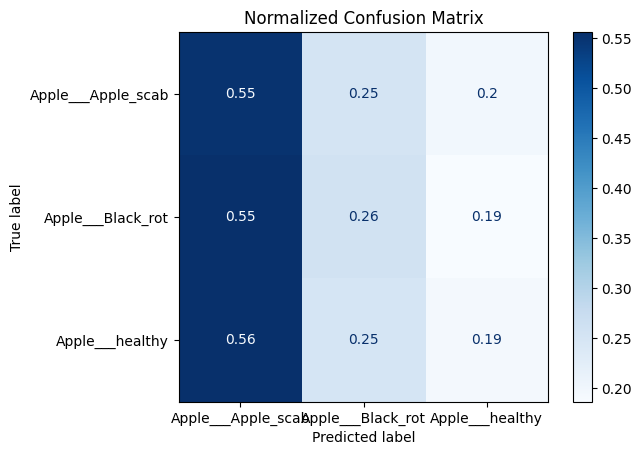

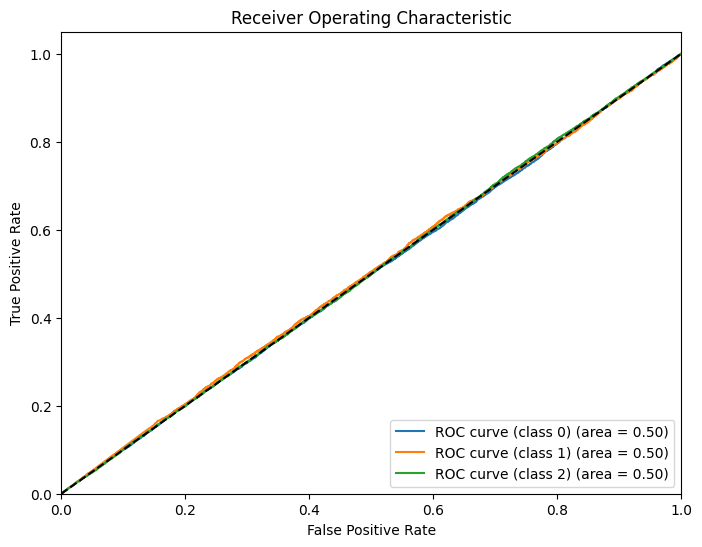

In [13]:
# Plot Training History
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')

    plt.show()

plot_training_history(history)

# Generate Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, class_names, normalize=False):
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Confusion Matrix, Without Normalization'

    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues')
    plt.title(title)
    plt.show()

# Predict test data
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = list(test_generator.class_indices.keys())

plot_confusion_matrix(y_true, y_pred_classes, class_names, normalize=False)
plot_confusion_matrix(y_true, y_pred_classes, class_names, normalize=True)

# ROC Curve for each class
def plot_roc_curve(y_true, y_pred, num_classes):
    y_true_bin = label_binarize(y_true, classes=[i for i in range(num_classes)])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_true, y_pred, num_classes)


In [14]:
model.weights

[<KerasVariable shape=(3, 3, 3, 32), dtype=float32, path=sequential_2/conv2d_8/kernel>,
 <KerasVariable shape=(32,), dtype=float32, path=sequential_2/conv2d_8/bias>,
 <KerasVariable shape=(3, 3, 32, 64), dtype=float32, path=sequential_2/conv2d_9/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_2/conv2d_9/bias>,
 <KerasVariable shape=(3, 3, 64, 128), dtype=float32, path=sequential_2/conv2d_10/kernel>,
 <KerasVariable shape=(128,), dtype=float32, path=sequential_2/conv2d_10/bias>,
 <KerasVariable shape=(3, 3, 128, 256), dtype=float32, path=sequential_2/conv2d_11/kernel>,
 <KerasVariable shape=(256,), dtype=float32, path=sequential_2/conv2d_11/bias>,
 <KerasVariable shape=(50176, 128), dtype=float32, path=sequential_2/dense/kernel>,
 <KerasVariable shape=(128,), dtype=float32, path=sequential_2/dense/bias>,
 <KerasVariable shape=(128, 3), dtype=float32, path=sequential_2/dense_1/kernel>,
 <KerasVariable shape=(3,), dtype=float32, path=sequential_2/dense_1/bias>]

In [15]:
# Test the model on unseen data
test_generator = test_datagen.flow_from_directory(
    os.path.join(r"Processed5_dataset\test"),  # Path to test data
    target_size=(m,n),
    batch_size=1,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

Found 1251 images belonging to 3 classes.
  19/1251 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 1.0000 - loss: 0.0018   

C:\Users\works\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1251/1251 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9941 - loss: 0.0140
Test Accuracy: 0.99


   6/1251 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step  

C:\Users\koush\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1251/1251 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step


<Figure size 800x600 with 0 Axes>

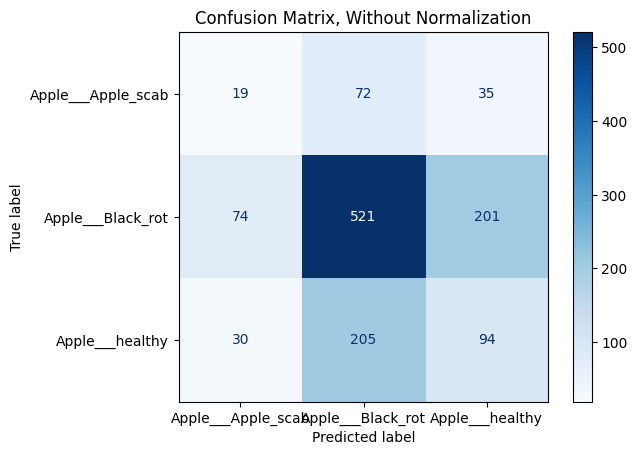

<Figure size 800x600 with 0 Axes>

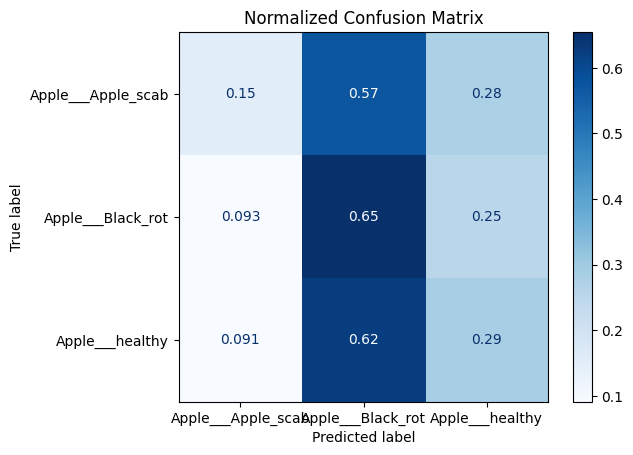

In [7]:
# Generate Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, class_names, normalize=False):
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Confusion Matrix, Without Normalization'

    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues')
    plt.title(title)
    plt.show()

# Predict test data
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = list(test_generator.class_indices.keys())

plot_confusion_matrix(y_true, y_pred_classes, class_names, normalize=False)
plot_confusion_matrix(y_true, y_pred_classes, class_names, normalize=True)
